## Import Libararies

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from plotly.graph_objs import *
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d mfaisalqureshi/spam-email

Dataset URL: https://www.kaggle.com/datasets/mfaisalqureshi/spam-email
License(s): CC0-1.0
100% 207k/207k [00:00<00:00, 363kB/s]
100% 207k/207k [00:00<00:00, 362kB/s]


In [7]:
!unzip spam-email.zip

Archive:  spam-email.zip
  inflating: spam.csv                


In [8]:
# load the Data:

data=pd.read_csv("spam.csv")
data.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Explore the Data

In [9]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
-------------------------
shape of the dataset -->> (5572, 2)


In [10]:
#get the statistical:
data.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [11]:
# get Types of features:
data.dtypes

,0
Category,object
Message,object


In [12]:
# know the number of every item in every column:
for col in data.columns:
    print(f"counts of items in  \n -->> {data[col].value_counts()}")
    print("-"*25)

counts of items in  
 -->> Category
ham     4825
spam     747
Name: count, dtype: int64
-------------------------
counts of items in  
 -->> Message
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Ok.                                                                                                                                                                     4
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!                     4
 

In [14]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>> {col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>> Category column  :  
['ham' 'spam']
**************************************************
All items in the ---->>> Message column  :  
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
**************************************************


In [15]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Category', 'Message'], dtype='object')
 Numerical_columns ----->>> Index([], dtype='object') 
 Discrete_columns ---->>> Index([], dtype='object') 
 Continous_cols ----->> Index([], dtype='object') 
 Nominal Columns --->> Category    2
dtype: int64


In [16]:
#check missing values:

data.isna().sum()

,0
Category,0
Message,0


## Explore Data

## Cleaning

In [17]:
# Not found any missing values :
data.isna().mean()

,0
Category,0.0
Message,0.0


In [18]:
# fill any null values if found  with ctegorical/object data :

for col in data.select_dtypes("object").columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    data[col] = np.squeeze(imputed_values)
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
# Check if there are aduplicated values in the data & drop it if found :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  415
Number of duplicates of cleaning it ----->>>  0


## preprocess on Data


In [21]:
# preprocess on the data :
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z0-9]',' ',data['Message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
# Vectorization the Data :

# Converting the Words to Vector using Bag of words
# split data into x_class, y_class :

cv=CountVectorizer(max_features=2500,ngram_range=(1,3))

x_class,y_clss=make_classification(n_samples=100,random_state=42)
x_class=cv.fit_transform(corpus)

# Convert all Categorical data for y_class  into Numerical columns :

label_encoder=LabelEncoder()
y_class=label_encoder.fit_transform(data["Category"])

print("x_class shape",np.shape(x_class))
print("y_class shape",np.shape(y_class))


x_class shape (5572, 2500)
y_class shape (5572,)


## Split Data into train and test sets

In [23]:
# make train_test_split on the Data :

x_train,x_test,y_train,y_test=train_test_split(x_class,y_class,test_size=0.2,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (4457, 2500)
x_test shape :  (1115, 2500)
y_train shape :  (4457,)
y_test shape :  (1115,)


## visualize the Data

In [24]:
# Calculate the value counts
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Define the color palette
color_palette = ['#8B008B', '#1E90FF']

# Create the pie chart
fig = px.pie(category_counts, names='Category', values='Count', color_discrete_sequence=color_palette)

# Update the layout
fig.update_layout(
    title="Observation Category",
    legend_title="Category",
    width=800,
    height=600
)

# Show the plot
fig.show()

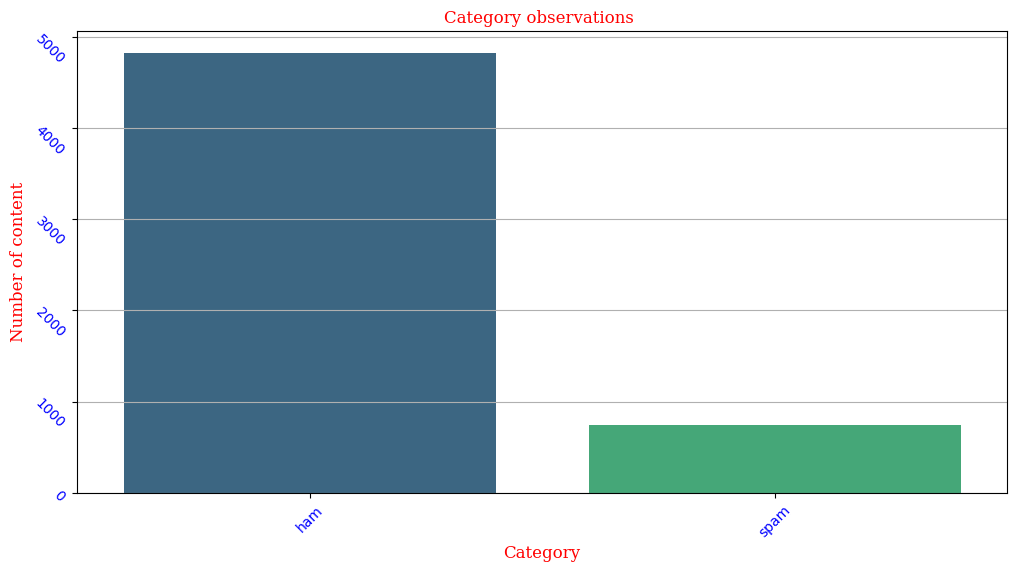

In [25]:
# plot the  :
f1 = {"family": "serif", "size": 12, "color": "r"}
color_palette = ['green', 'darkgreen']
cat = data['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cat.index, y=cat.values,hue=cat.index,palette="viridis")
plt.title('Category observations ',fontdict=f1)
plt.xlabel('Category',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

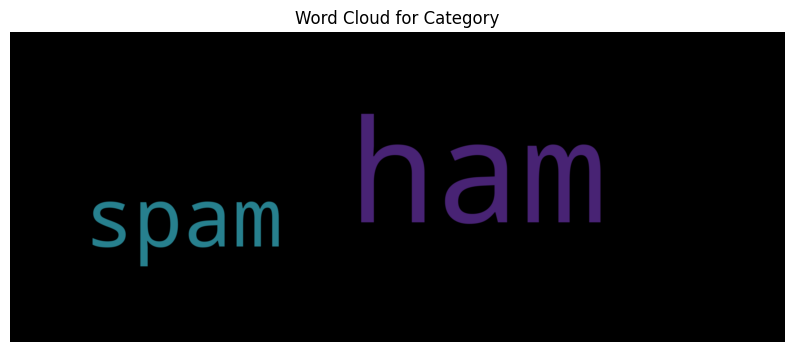

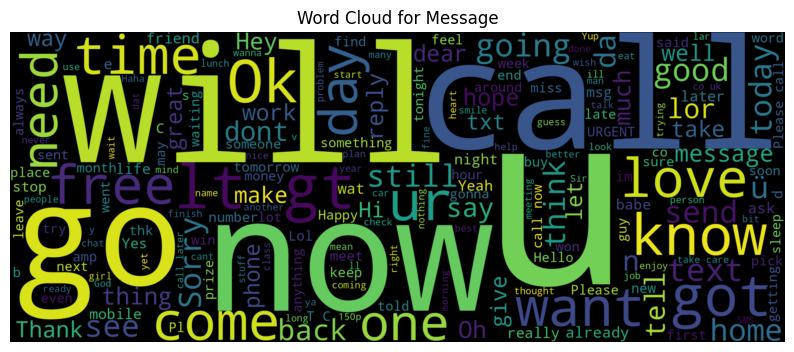

In [26]:
from wordcloud import WordCloud
# Sample DataFrame
data1 =data["Message"]

# Select object columns
object_columns = data.select_dtypes(include=['object'])

# Iterate over each object column and generate a word cloud
for column in object_columns.columns:
    # Join the text data into a single string
    text = ' '.join(object_columns[column].astype(str))

    # Create a WordCloud object
    wordcloud = WordCloud(width=2500, height=1000, random_state=1).generate(text)

    # Display the generated Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(f'Word Cloud for {column}')
    plt.show()

## Bulding Five Traditional Machine Learning Modules
                             
- KNeighborsClassifier (KNN)

- RandomForestClassiﬁer

- Decision Tree Classiﬁer

- Logistic Regression

- adaboosting classiﬁer


In [27]:
models={
    "LogisticRegression":LogisticRegression(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=5,random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "knn_classifier" : KNeighborsClassifier(n_neighbors=2),
    "adboosting":AdaBoostClassifier(n_estimators=50, random_state=42)
          }

Model: LogisticRegression
Mean Squared Error (MSE): 0.016143497757847534
model_accuracy: 98.39%
LogisticRegression Evaluation Metrics:
LogisticRegression R^2 Score: 86.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------
Model: DecisionTreeClassifier
Mean Squared Error (MSE): 0.06098654708520179
model_accuracy: 93.90%
DecisionTreeClassifier Evaluation Metrics:
DecisionTreeClassifier R^2 Score: 47.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       0.96      0.57      0.71       149

    accuracy                           0.94      1115
 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Model: adboosting
Mean Squared Error (MSE): 0.01883408071748879
model_accuracy: 98.12%
adboosting Evaluation Metrics:
adboosting R^2 Score: 83.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.97      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------


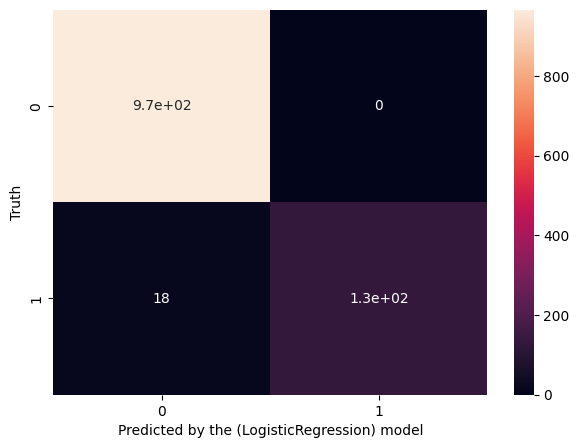

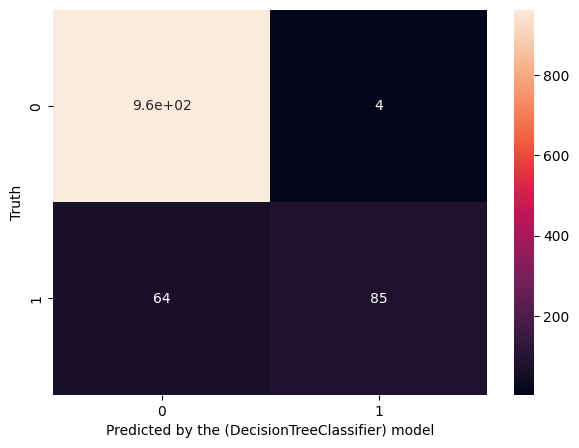

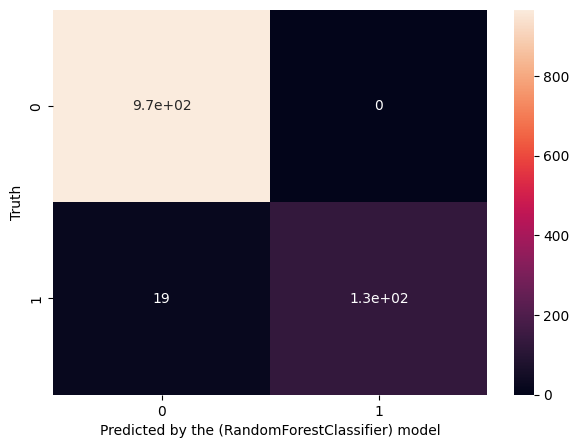

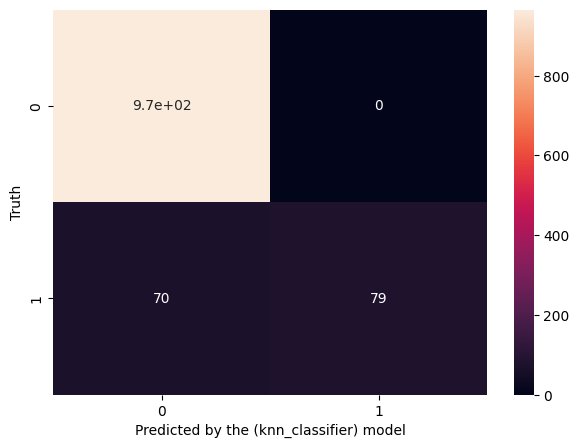

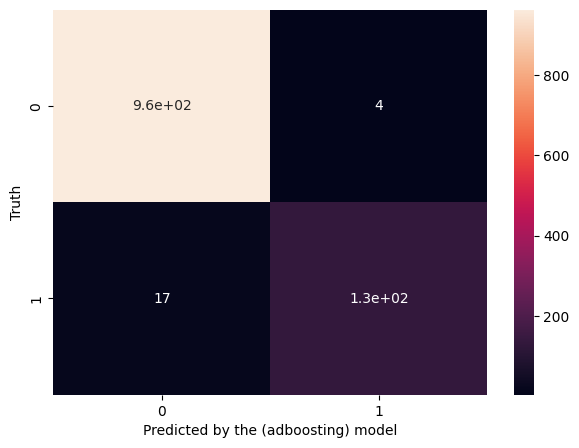

In [28]:
for model_name, model in models.items():
    # Fit the model to the training data

    model.fit(x_train, y_train)

    # Make predictions on the test data

    y_pred = model.predict(x_test)

    # Evaluate the model

    mse = metrics.mean_squared_error(y_test, y_pred)
    acc = model.score(x_test,y_test)

    model_evaluation_metrics = {}
    # Calculate confusion matrix and classification report

    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)

    # Calculate R^2 score

    r2 = metrics.r2_score(y_test, y_pred)

    # Store the evaluation metric
    model_evaluation_metrics[model_name] = r2

    # Storing the results

    model_evaluation_metrics[model_name] = {
        "Confusion Matrix":cm,
        'Classification Report': classif_report
            }

    plt.figure(figsize=(7,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel(f"Predicted by the ({model_name}) model")
    plt.ylabel('Truth'),

    # Print the evaluation metrics for each model

    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"model_accuracy: {acc*100:0.2f}%")
    print(f"{model_name} Evaluation Metrics:")
    print(f"{model_name} R^2 Score: {(abs(r2) * 100):.2f}%")
    print("\nClassification Report:")
    print(classif_report)
    print("-"*50)



In [29]:
# Explain the prediction for DecisionTree_model :
DT=models["DecisionTreeClassifier"]
tree_representation = tree.export_text(DT)
print(tree_representation)

|--- feature_390 <= 0.50
|   |--- feature_2229 <= 0.50
|   |   |--- feature_2462 <= 0.50
|   |   |   |--- feature_852 <= 0.50
|   |   |   |   |--- feature_491 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_491 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_852 >  0.50
|   |   |   |   |--- feature_904 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_904 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2462 >  0.50
|   |   |   |--- feature_182 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_182 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_2229 >  0.50
|   |   |--- feature_2164 <= 0.50
|   |   |   |--- feature_1290 <= 0.50
|   |   |   |   |--- feature_1778 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1778 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1290 >  0.50
|   |   |   |   |--- feature_2475 <= 0.50
|   |   |   |   |   |--- class: 0
|

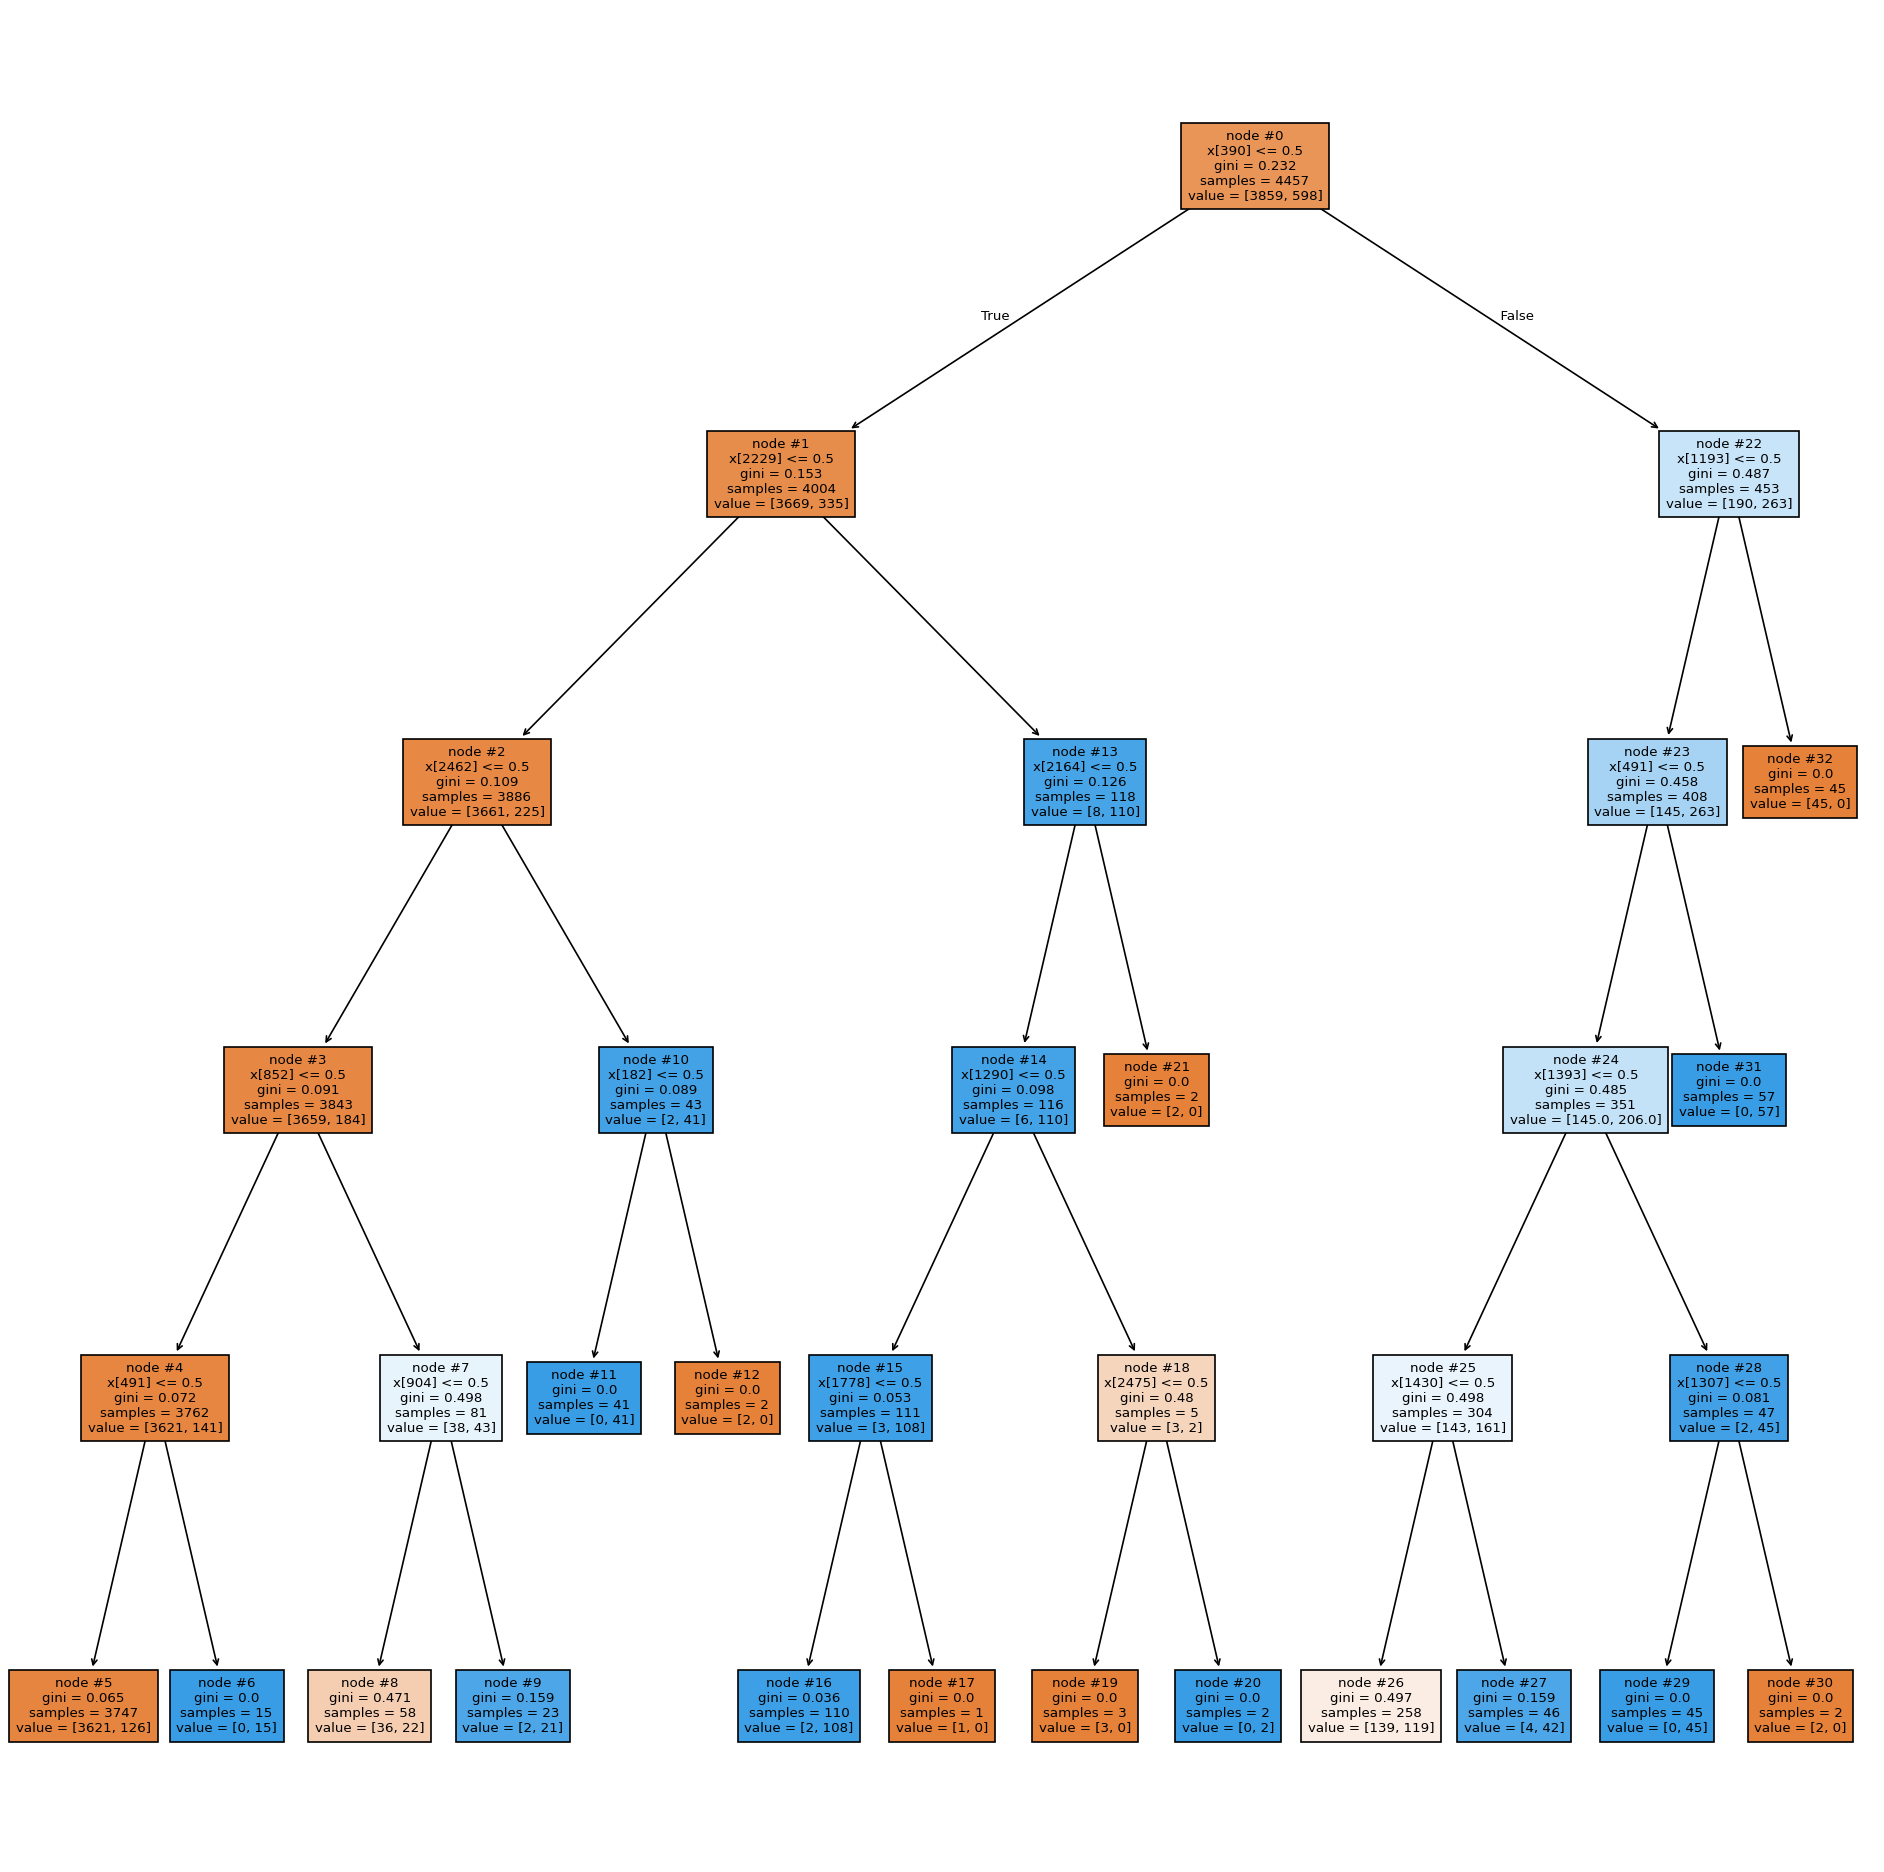

In [30]:
# Create the decision tree model
decision_tree_model = models["DecisionTreeClassifier"]

# Plot the tree
plt.figure(figsize=(20, 20), dpi=120)  # Adjust figure size as needed
tree.plot_tree(decision_tree_model, filled=True, node_ids=True, fontsize=8)
plt.show()

## LSTM Neural Network Model

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Flatten
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import datetime
import os
import tensorflow as tf

## Preprocessing

In [32]:
# Convert categories to binary labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])

# Separate features and labels
X = df['Message']
y = df['category_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
vocab_size = 10000
oov_tok = '<oov>'
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences

max_sequence_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Convert labels to categorical
num_classes = 2
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


<ipython-input-32-744902e45507>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Bulding Model and Training it

In [37]:
# Building the model
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_sequence_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Flatten(),  # Flatten the output
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


# define differnt callbacks

call1 = ModelCheckpoint("model.weights.h5", save_weights_only=True, verbose=1)
call2 = ModelCheckpoint("model.keras", monitor='val_loss', save_best_only=True, verbose=1)
call3 = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss", verbose=1)
call4 = CSVLogger("training.csv", append=True)

# define tensorboard :
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2 )

# Combine all callbacks
callbacks = [tensorboard_callback, call1, call2, call3, call4]

# Model training
print("\n model training :")
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test_pad, y_test_cat),callbacks=callbacks)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


 model training :
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8757 - loss: 0.3666
Epoch 1: saving model to model.weights.h5

Epoch 1: val_loss improved from inf to 0.14322, saving model to model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.8758 - loss: 0.3637 - val_accuracy: 0.8682 - val_loss: 0.1432
Epoch 2/10
30/33 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9703 - loss: 0.0977
Epoch 2: saving model to model.weights.h5

Epoch 2: val_loss improved from 0.14322 to 0.05291, saving model to model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9715 - loss: 0.0957 - val_accuracy: 0.9845 - val_loss: 0.0529
Epoch 3/10
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9945 - loss: 0.0193
Epoch 3: saving model to model.weights.h5

Epoch 3: val_loss improved from 0.05291 to 0.05162, saving model to model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9945 - loss: 0.0192 - val_accuracy: 0.9864 - val_loss: 0.0516
Epoch 4/10
31

## Predicting Model

In [40]:
# predict on the model:
y_p=model.predict(X_test_pad)
y_p[:10]

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[9.9999976e-01, 2.0975347e-07],
       [4.8216146e-01, 5.1783854e-01],
       [1.0000000e+00, 2.0101204e-11],
       [1.0000000e+00, 3.5089218e-10],
       [9.9981838e-01, 1.8164744e-04],
       [1.3441565e-02, 9.8655850e-01],
       [1.0871243e-03, 9.9891293e-01],
       [5.3025438e-03, 9.9469745e-01],
       [4.1006398e-03, 9.9589938e-01],
       [1.0000000e+00, 2.4316281e-08]], dtype=float32)

In [41]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 1.4633431185545609e-12 
 the max_value for prediction --->>> 1.0 


In [42]:
#Evalute the ANN_model:
model.evaluate(X_test_pad,y_test_cat,verbose=2)

33/33 - 0s - 9ms/step - accuracy: 0.9874 - loss: 0.0507


[0.050669651478528976, 0.9874030947685242]

## Model Graph

In [44]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 42.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning:

The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.



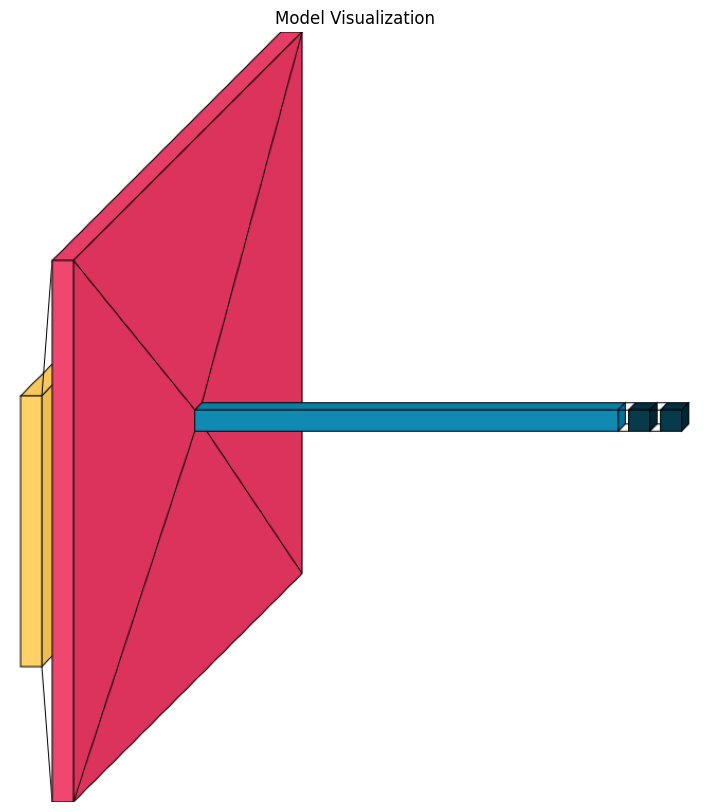

In [45]:
import visualkeras
from PIL import Image

# Save the visualization as an image file
visualization_path = 'model_visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Model Visualization")
plt.axis('off')
plt.show()

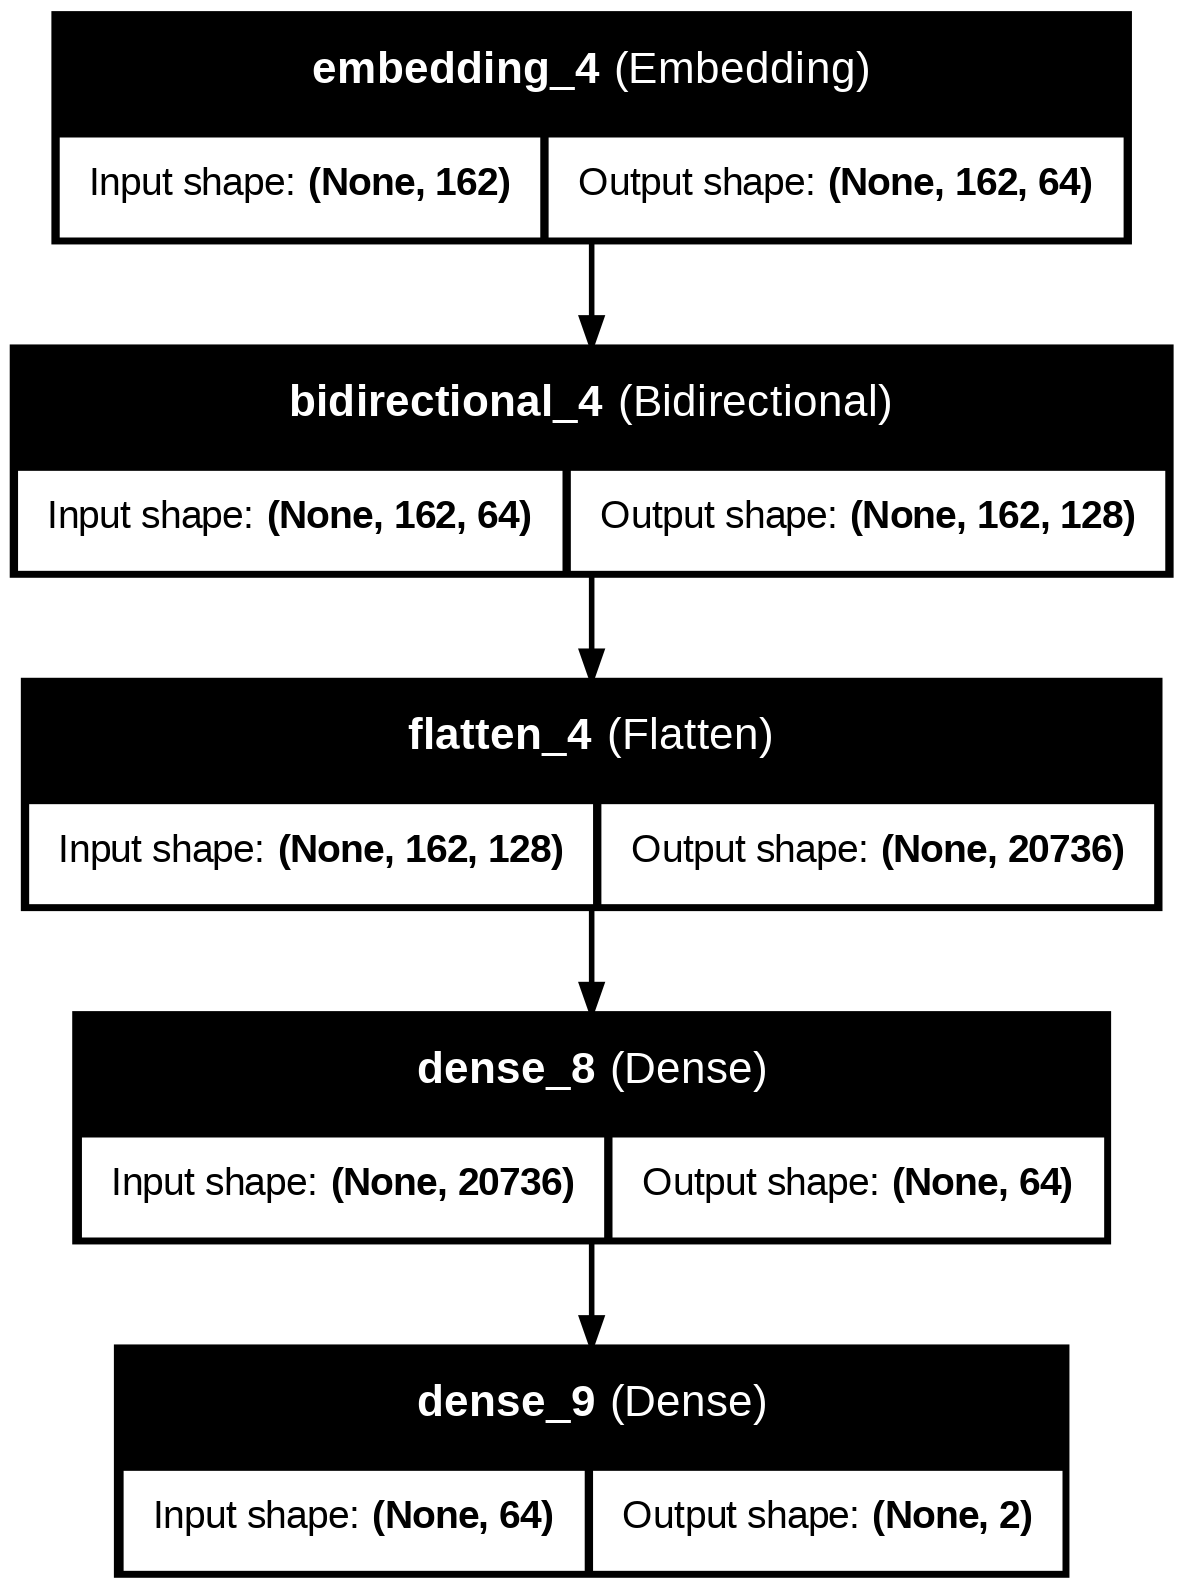

In [46]:
# plot graph model :

plot_model(model,show_shapes=True,show_layer_names=True,to_file="model.png")

## Train Results

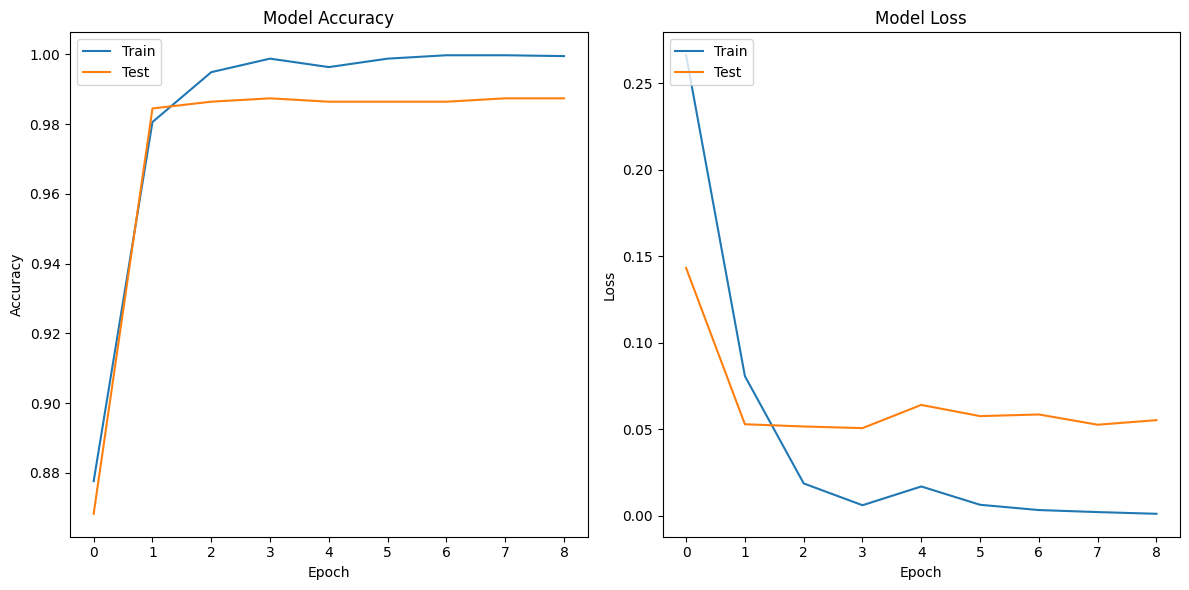

In [47]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Table with Summary of Training LSTM Model

In [48]:
train=pd.read_csv("training.csv")
train

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.877576,0.266159,0.868217,0.143216
1,1,0.980606,0.080727,0.984496,0.052909
2,2,0.994909,0.018704,0.986434,0.051618
3,3,0.998788,0.006104,0.987403,0.050670
4,4,0.996364,0.016946,0.986434,0.064092
5,5,0.998788,0.006367,0.986434,0.057607
6,6,0.999758,0.003316,0.986434,0.058559
7,7,0.999758,0.002146,0.987403,0.052635
8,8,0.999515,0.001158,0.987403,0.055288
